In [21]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

df=pd.read_csv("./data/training_dataset.csv",low_memory=False)
df.match_date = df.match_date.apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))

In [22]:
df

,player1_name,player1_atprank,player1_games,player1_wins,player1_loses,player2_name,player2_atprank,player2_games,player2_wins,player2_loses,match_date,match_location,match_tournament,match_surface,match_odd_player1,match_odd_player2,winner_player1
0,Harrison R.,481,272,117,155,Mager G.,67,59,24,35,2021-01-07,Delray Beach,Delray Beach Open,Hard,1.72,2.00,0
1,Korda S.,26,126,75,51,Kwon S.W.,68,108,53,55,2021-01-07,Delray Beach,Delray Beach Open,Hard,1.72,2.00,1
2,Paul T.,14,204,111,93,Nam J.S.,590,3,0,3,2021-01-07,Delray Beach,Delray Beach Open,Hard,1.12,6.00,1
3,Kecmanovic M.,40,210,107,103,Travaglia S.,1024,81,27,54,2021-01-07,Antalya,Antalya Open,Hard,1.44,2.62,0
4,Bellucci T.,915,380,179,201,Monteiro T.,121,171,69,102,2021-01-07,Delray Beach,Delray Beach Open,Hard,3.00,1.36,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7057,Evans D.,30,251,124,127,Tiafoe F.,10,303,158,145,2023-08-05,Washington,Citi Open,Hard,3.75,1.29,1
7058,Griekspoor T.,37,97,47,50,Fritz T.,9,356,205,151,2023-08-06,Washington,Citi Open,Hard,3.50,1.30,1
7059,De Minaur A.,19,272,161,111,Tsitsipas S.,5,390,264,126,2023-08-06,Los Cabos,Los Cabos Open,Hard,3.20,1.36,0
7060,Evans D.,30,251,124,127,Dimitrov G.,20,651,389,262,2023-08-06,Washington,Citi Open,Hard,3.20,1.36,1


In [23]:
df = df.dropna()
df.shape

(7029, 17)

In [24]:
from sklearn.model_selection import train_test_split

X = df[["player1_atprank", "player1_games", "player1_wins", "player1_loses", "player2_atprank", "player2_games", "player2_wins", "player2_loses","match_date", "match_odd_player1", "match_odd_player2"]]
y = df.winner_player1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)# shuffle=False)

In [25]:
from sklearn import preprocessing

X_train_filtered = X_train.drop("match_date",axis=1)
X_test_filtered = X_test.drop("match_date",axis=1)

#normalisation is useless for gradientboostingclassifier
#scaler = preprocessing.StandardScaler().fit(X_train_filtered)
#X_train_filtered = scaler.transform(X_train_filtered)
#X_test_filtered = scaler.transform(X_test_filtered)

X_train_filtered

,player1_atprank,player1_games,player1_wins,player1_loses,player2_atprank,player2_games,player2_wins,player2_loses,match_odd_player1,match_odd_player2
552,149,527,237,290,5,390,264,126,10.00,1.06
1458,38,243,120,123,128,742,383,359,3.40,1.33
4270,108,204,79,125,18,143,79,64,3.75,1.28
6208,7,392,255,137,11,378,217,161,1.50,2.63
186,150,93,43,50,149,527,237,290,1.16,5.00
...,...,...,...,...,...,...,...,...,...,...
2046,1,164,130,34,5,390,264,126,4.50,1.20
6805,191,2,0,2,68,20,7,13,3.20,1.36
1845,17,238,137,101,3,406,289,117,4.33,1.22
1623,317,4,1,3,159,9,5,4,3.20,1.36


In [26]:
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
model = model.fit(X_train_filtered, y_train)

#cross_val_score(dtree, X_test, y_test, cv=10)

y_predict = model.predict(X_test_filtered)

accuracy_score(y_predict, y_test)

0.6963015647226174

In [27]:
# ROI return of investment on all games

print("We bet 1€ on all test matches")
df_roi = X_test.copy()
df_roi["y_predict"] = y_predict
df_roi["y_test"]=y_test

money_invested=df_roi.shape[0]
print("money spent:", money_invested,"€")

money_won = 0.0
for index, row in (df_roi[y_predict == y_test]).iterrows():
    if row.y_predict == 0 :
        money_won += row.match_odd_player2
    else:
        money_won += row.match_odd_player1

print("money won:",round(money_won,2),"€")
print("TOTAL:", round(money_won,2) - money_invested,"€")

We bet 1€ on all test matches
money spent: 1406 €
money won: 1417.87 €
TOTAL: 11.86999999999989 €


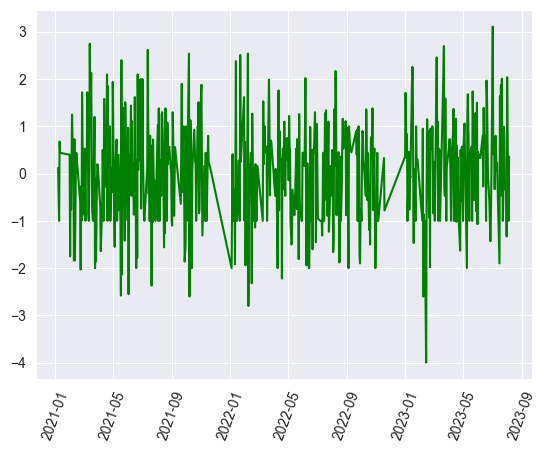

In [28]:
# on all games 
import matplotlib.pyplot as plt

df_roi = df_roi.sort_values(by='match_date')
dates = df_roi.match_date.unique()
data = []

for date in dates :
    money_won = 0.0
    #test = df_roi.at[df_roi.index[0],"match_date"]
    df_roi_filtered = df_roi.loc[df_roi["match_date"]==date]
    #print(df_roi_filtered)
    money_won-=df_roi_filtered.shape[0]

    for index, row in (df_roi_filtered.loc[df_roi_filtered["y_predict"] == df_roi_filtered["y_test"]]).iterrows():
        if row.y_predict == 0 :
            money_won += row.match_odd_player2
        else:
            money_won += row.match_odd_player1

    data.append(money_won)

dates = dates.astype('datetime64[ns]')

plt.plot_date(pd.to_datetime(dates.date, format='%Y-%m-%d'), data, 'g')
plt.xticks(rotation=70)
plt.show()


d = {'date': dates.date, 
     'money_won': data}
roi = pd.DataFrame(data=d)

In [29]:
#only games where predict proba is > 0.8

y_predict_proba = model.predict_proba(X_test_filtered)


print("We bet 1€ on all test matches where proba score is > 0.9")
df_roi = X_test.copy()
df_roi["y_predict_proba"] = y_predict_proba[:,0]   #all rows, first column = prediction score for winner 1 
df_roi["y_predict"] = y_predict
df_roi["y_test"]=y_test

df_roi= df_roi.loc[(df_roi["y_predict_proba"]>0.9) | (df_roi["y_predict_proba"]<0.1)]

money_invested=df_roi.shape[0]

money_won = 0.0
for index, row in (df_roi[y_predict == y_test]).iterrows():
    if row.y_predict == 0 :
        money_won += row.match_odd_player2
    else:
        money_won += row.match_odd_player1

print("money spent:", money_invested,"€")
print("money won:",round(money_won,2),"€")
print("TOTAL:", round(money_won - money_invested, 2),"€")
print("ROI:", round(money_won*100/money_invested,2),"%")
                

We bet 1€ on all test matches where proba score is > 0.9
money spent: 119 €
money won: 129.55 €
TOTAL: 10.55 €
ROI: 108.87 %


C:\Users\chbou\AppData\Local\Temp\ipykernel_19832\2583228203.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for index, row in (df_roi[y_predict == y_test]).iterrows():


In [30]:
df_roi

,player1_atprank,player1_games,player1_wins,player1_loses,player2_atprank,player2_games,player2_wins,player2_loses,match_date,match_odd_player1,match_odd_player2,y_predict_proba,y_predict,y_test
3000,2,1207,1012,195,18,143,79,64,2022-02-21,1.06,10.00,0.023911,1,1
2144,9,356,205,151,146,63,19,44,2021-09-28,1.14,5.50,0.077414,1,1
2553,44,932,687,245,345,2,0,2,2022-01-11,1.08,8.00,0.004942,1,1
3361,9,356,205,151,430,4,0,4,2022-04-12,1.02,17.00,0.002391,1,1
2009,19,500,346,154,287,678,369,309,2021-08-31,1.04,13.00,0.041402,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6711,14,204,111,93,200,8,0,8,2023-07-05,1.11,6.50,0.005716,1,1
5564,72,95,47,48,915,380,179,201,2023-02-22,1.03,15.00,0.030327,1,1
5388,140,3,0,3,155,26,7,19,2023-02-08,2.10,1.73,0.938765,0,0
1077,5,390,264,126,31,215,99,116,2021-05-21,1.04,13.00,0.045986,1,1
